# Learning outcomes

* Introduce the participants to the diffrent behavioral measures 
* Introduce the participants to tha basic data cleaning and preparation for machine learning application
    * reading, viewing, statistical description, and writing of data file in csv format
    * data formatting
    * data labeling
* Create structural/behavioral datasets for machine learning modeling

# Libraries import 

In [1]:
import os
import random
import numpy as np
import pandas as pd

# Notenook general settings

In [2]:
pd.set_option('display.max_columns', None)

# Functions defination

In [3]:
# define function that finds the label based on value
def find_label(input_dict, value):    
    result = 0
    for k, v in input_dict.items():
        if value in v:
            result = k
    return str(result)

# Paths definition

In [4]:
# raw data paths defination
structural_data_path_raw = os.path.join('.','data','raw','structural')
behavioral_data_path_raw = os.path.join('.','data','raw','behavioral')

# intermediate data paths
structural_data_path_interm = os.path.join('.','data','intermediate','structural')
behavioral_data_path_interm = os.path.join('.','data','intermediate','behavioral')

# preprocessed data paths
preprocessed_data_path = os.path.join('.','data','preprocessed')


## Structural data

In [5]:
# Task 1: read the structural data csv file
# Hint: use pd.read_csv(path/to/data/file) function to read csv file
# File name: 'fastsurfer_normative_data.csv' 

### START CODE HERE ### (≈ 1 line of code)

# structural_data = pd.read_csv(os.path.join(structural_data_path_raw,'file_name.csv'))

### END CODE HERE ###

# Solution:
# structural_data = pd.read_csv(os.path.join(structural_data_path_raw,'fastsurfer_normative_data.csv'))

In [6]:
# Task 2: print sample of the read file
# Hint: use table_name.head(number of row tow view) to view 10 rows of the read file

### START CODE HERE ### (≈ 1 line of code)

# structural_data.

### END CODE HERE ###

# Solution:
# structural_data.head()

In [7]:
# Task 3: print the statistical propoerties of the read file
# Hint: use table_name.describe() to view the statistical properties of the read file

### START CODE HERE ### (≈ 1 line of code)

# structural_data.

### END CODE HERE ###

# Solution
# structural_data.describe()

In [8]:
# Task 4: inpredictive columns dropping
# Hint: use table_name.drop() to drop columns
# columns to drop: ['CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior']

### START CODE HERE ### (≈ 1 line of code)

# structural_data(columns=['add', 'column', 'names', 'here'],inplace=True)

### END CODE HERE ###

# Solution:
# structural_data.drop(columns=['CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior'],inplace=True)

In [10]:
# Task5: subject id formating
# Hint: use table_name.column_name.apply(lambda x: define your function here) 

### START CODE HERE ### (≈ 1 line of code)

# structural_data.subject = structural_data.subject.apply(lambda x: )

### END CODE HERE ###

# Solution:
# structural_data.subject = structural_data.subject.apply(lambda x:  x.split('_')[0])

In [11]:
# Task6: Age conversion from months to years
# Hint: divide the age column by 12 

### START CODE HERE ### (≈ 1 line of code)

# structural_data.age =

### END CODE HERE ###

# Solution:
# structural_data.age = structural_data.age/12 

In [12]:
# data rearrangement 
# ids, labels, data = structural_data.iloc[:,0], structural_data.iloc[:,1:3], structural_data.iloc[:,3:]  
# structural_data = pd.concat((ids,data,labels),axis=1)

In [13]:
# Task7: save data to disk 
# Hint: use table_name.to_csv(path/to/saved/file.csv) 
# File name = 'structural_data.csv'

### START CODE HERE ### (≈ 1 line of code)

# structural_data.to_csv(os.path.join(structural_data_path_interm,'file_name.csv')

### END CODE HERE ###

# Solution:
# structural_data.to_csv(os.path.join(structural_data_path_interm,'structural_data.csv'), index=False)

In [13]:
# Task8: split dataset into left and right hemispheres
# Hint: Identify the columns that start with left and right in their own lists using list comprehnesion
# Left hemisphere columns strat with: ('Left','ctx-lh','subj','sex','age')
# Right hemisphere columns strat with: ('Right','ctx-rh','subj','sex','age')

# store all columns names in a list
# columns = list(structural_data.columns)

### START CODE HERE ### (≈ 2 line of code)

# left = [col for col in columns if col.startswith(left hemisphere columns tuple)]
# right = [col for col in columns if col.startswith(right hemisphere columns tuple)]

### END CODE HERE ###

# Solution: 
# left = [col for col in columns if col.startswith(('Left','ctx-lh','subj','sex','age'))]
# right = [col for col in columns if col.startswith(('Right','ctx-rh','subj','sex','age'))]

In [14]:
# Task9: data spliting into left and right
# Hint: use the left and right list to filter the columns for each dataset

### START CODE HERE ### (≈ 2 line of code)

# structural_data_left = structural_data[]
# structural_data_right = structural_data[]

### END CODE HERE ###

# Solution
# structural_data_left = structural_data[left]
# structural_data_right = structural_data[right]

In [15]:
# # save the three datasets to the disk
# structural_data_left.to_csv(os.path.join(preprocessed_data_path,'structural_data_left.csv'),index=False)
# structural_data_right.to_csv(os.path.join(preprocessed_data_path,'structural_data_right.csv'),index=False)
# structural_data.to_csv(os.path.join(preprocessed_data_path,'structural_data_full.csv'),index=False)

## Visual acuity 

Vision is a complex sensation that provides us with a personal conscious representation of our surrounding environment. Loss of vision or blindness may limit a person’s ability to complete normal, daily activities and decrease overall quality of life. Visual impairment can impose various limitations on a person’s functional ability, including reading, mobility (which includes driving), visual information processing (also called “seeing”), and visually guided motor behavior (also called “manipulation”). One core NIH Toolbox vision measure is available with national normative scores provided [1].


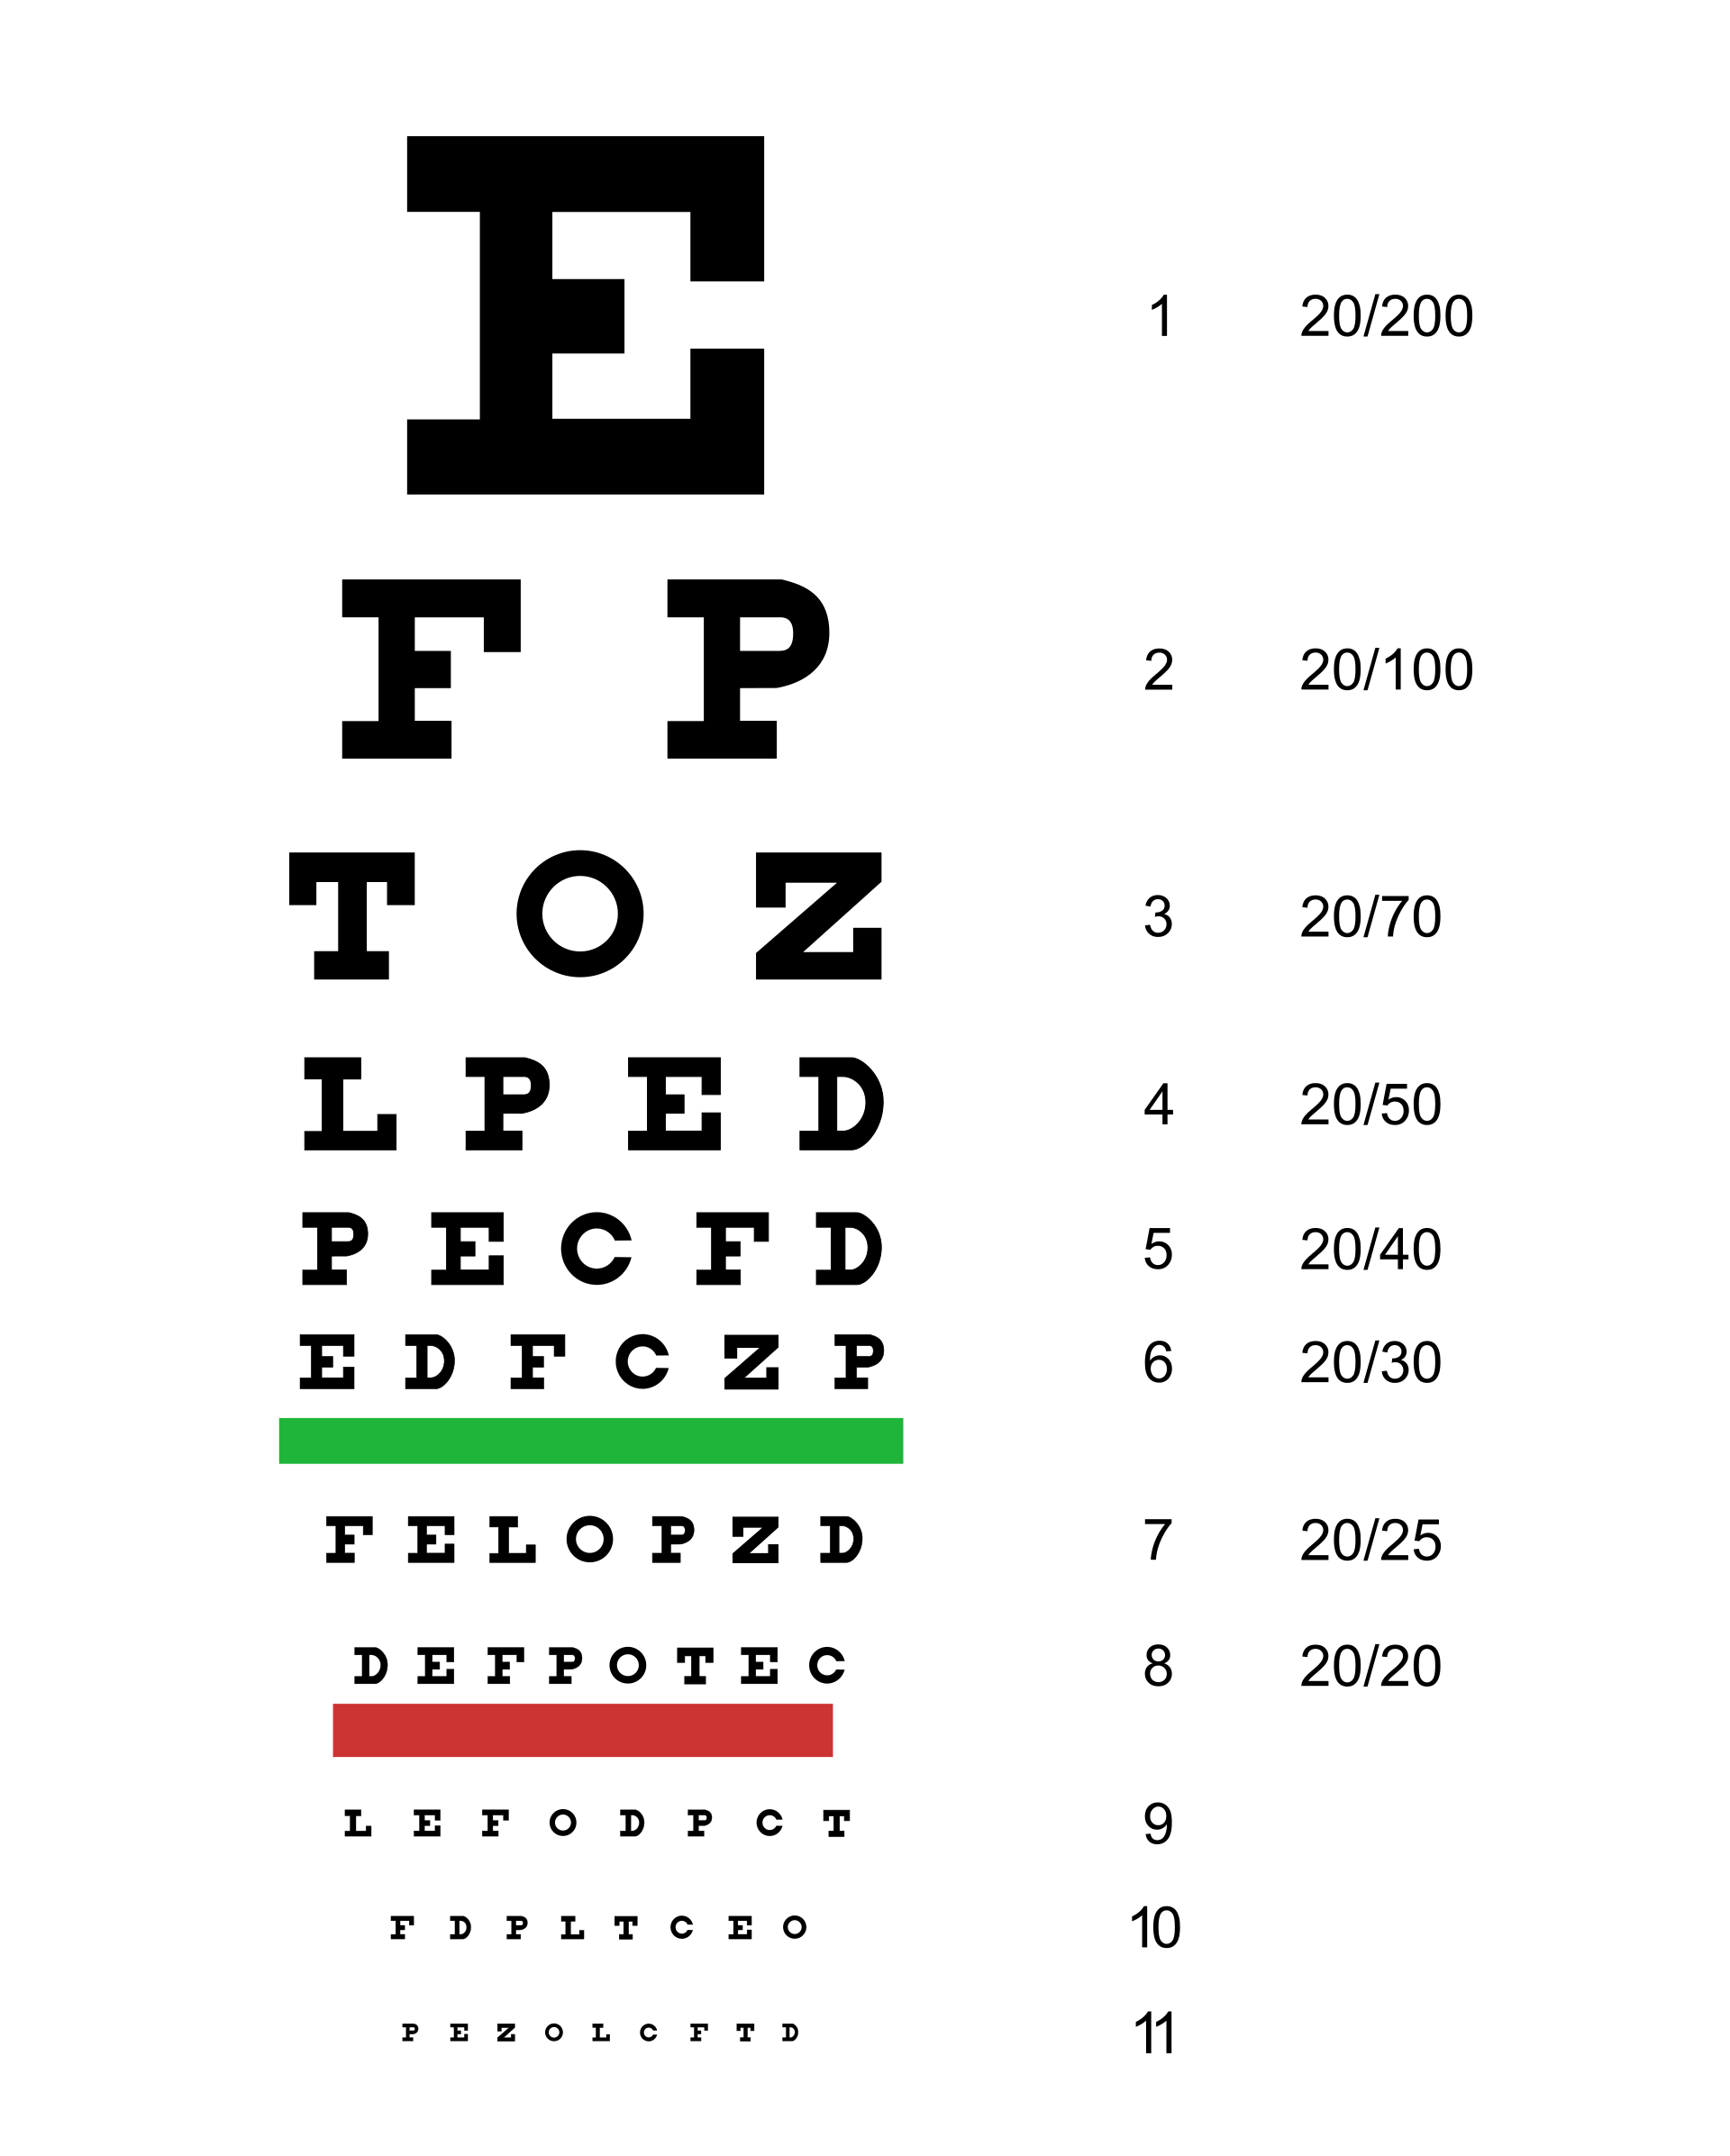

### Description: 
This test directly measures participants’ visual acuity or distance vision. The participant is seated 3 meters away from the iPad screen at eye level, and letters (called “optotypes”) are displayed one at a time on the screen for the participant to identify, using both eyes at the same time, with the participant wearing his/her normal corrective lenses for distance vision (glasses or contact lenses), if worn. As the participant successfully identifies optotypes of a given size, smaller ones appear on the screen, until the software ascertains the smallest-size optotype the participant can successfully see. Conversely, the program displays larger optotypes if the participant cannot see the size that is first displayed, until a size that he/she can accurately see is found. For participants ages 3-7, only the letters H, O, T and V are used, and children may point to a laminated card showing the letters if they cannot verbalize or recall the letter names. For participants ages 8 and above, the entire set of optotypes is used, following a common protocol used in professional vision testing. This test takes approximately three minutes to administer and is recommended for ages 3-85. HCP administered the task to participants in both studies (ages 5+), as well as to all able parents from the Development Study [2].


### Interpretation:
The Visual Acuity Test provides a reliable measure of participants’ overall functional distance vision since it measures both eyes simultaneously. In everyday life, a Snellen equivalent of 20/40 or better (including corrective lenses) is typically a requirement of obtaining a motor vehicle license. Federal government definitions of “legally blind” refer to corrected vision in the individual’s better eye of 20/200 and worse [3]. 

### Key points:
* Provides a quick and accurate assessment of distance vision 
* Children and older adults have different sets of optotypes or letters 
* Participants sit 3 meters away from an iPad at eye level 
* Participants that normally wear glasses for distance vision should use them 
* Children Ages 3-7 
     * can point to a card to show what letter they saw on the screen (H O T V) 
     * There is a training where the child is encouraged to name the letters. Letter naming is not required 
     * There is also a practice where a set of 4 letters is presented at 20/400. If the child does not succeed after 3 times, testing is discontinued 
* Ages 8+ the card is not used 
* If the participant requires a very strong correction but does not have their corrective lenses, the test is likely invalid 
* If the participant does wear lenses but are not as strong and forgot them, the examiner makes a judgement call 
* The letter sets are different for younger and older participants 
* The test progressively presents smaller letters if the participant is correct, and larger letters if they are wrong, until an acuity score is established and the test ends 

### References:
[1]  Lifespan HCP 2.0 Data Release  Appendix 2: Details and References for Behavioral & Clinical Instruments. Avaialble from: https://www.humanconnectome.org/storage/app/media/documentation/LS2.0/LS_2.0_Release_Appendix_2.pdf  
[2] Visual Acuity Test. NIH Tool Box. Available from: https://nihtoolbox.org/test/visual-acuity-test/  
[3] Scoring and Interpretation Guide for the iPad, NIH Tool Box. Available from: https://www.nihtoolbox.org/app/uploads/2022/05/Toolbox_Scoring_and_Interpretation_Guide_for_iPad_v1.7-5.25.21.pdf

In [14]:
# Task 1: read the visual acuity csv file
# Hint: use pd.read_csv(path/to/data/file) function to read csv
# file name: 'tlbx_sensation01.txt'

### START CODE HERE ### (≈ 1 line of code)

# visual_acuity = pd.read_csv(os.path.join(behavioral_data_path_raw,'file_name.txt'),sep=None,engine='python')
# visual_acuity = visual_acuity[visual_acuity.staticvalogmar.isna() == False]

### END CODE HERE ###

# Solution:
# visual_acuity = pd.read_csv(os.path.join(behavioral_data_path_raw,'tlbx_sensation01.txt'),sep=None,engine='python')
# visual_acuity = visual_acuity[visual_acuity.staticvalogmar.isna() == False]

In [15]:
# Task 2: print sample of the read file
# Hint: use table_name.head(number of row tow view) to view 10 rows of the read file

### START CODE HERE ### (≈ 1 line of code)

# visual_acuity.

### END CODE HERE ###

# Solution:
# visual_acuity.head()

In [16]:
# Task 3: print the statistical propoerties of the read file
# Hint: use table_name.describe() to view the statistical properties of the read file

### START CODE HERE ### (≈ 1 line of code)

# visual_acuity.

### END CODE HERE ###

# Solution
# visual_acuity.describe()

In [18]:
# Task4: subject id column name handling
# Hint: use the function table_name.rename to rename the subject ID columns
# {"src_subject_id":"subject"}

### START CODE HERE ### (≈ 1 line of code)

# visual_acuity.rename(columns= {'old_name': 'new_name'} ,inplace=True)

### END CODE HERE ###

# Solution
# visual_acuity.rename(columns={"src_subject_id":"subject"},inplace=True)

# save the dataset to disk
# visual_acuity.to_csv(os.path.join(behavioral_data_path_interm,'visual_acuity.csv'), index=False)

In [19]:
# Task5: data labeling
# Hint: use the defined classes dictionary to convert logmar scores into distinct classes using find_label() 



### START CODE HERE ### (≈ 2 line of code)

# visual_acuity = visual_acuity.iloc[1:,:]
# visual_acuity['class'] = visual_acuity['staticvalogmar'].astype(float)

### END CODE HERE ###

# Solution:
# visual_acuity = visual_acuity.iloc[1:,:]
# visual_acuity['class'] = visual_acuity['staticvalogmar'].astype(float)

In [23]:
# Task6: Link the structural data with moca lablels and save them as combined dataset in csv format
# Hint: select the the subject and label columns from cognitive_data and merge them with the structural data 
# using pd.merg() function
# Column names: ['subject','class']
# File name: 'structural_visual.csv'

### START CODE HERE ### (≈ 3 line of code)

# visual_acuity_label = visual_acuity[['add', 'column', 'names', 'here']]
# structural_moca = pd.merge('structural_data_table', 'visual_data_labels')
# structural_moca.to_csv(os.path.join(preprocessed_data_path,'file_name.csv'),index=False)

### END CODE HERE ###

# Solution:
# visual_acuity_label = visual_acuity[['subject','class']]
# structural_visual = pd.merge(structural_data,visual_acuity_label)
# structural_visual.to_csv(os.path.join(preprocessed_data_path,'structural_visual.csv'),index=False)

## Cognitive impairment

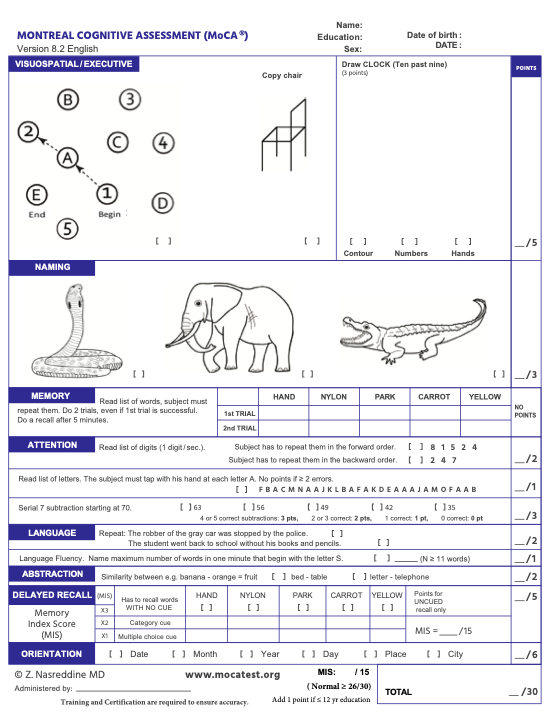

### Montreal Cognitive Assessment (MoCA) 
Participants in the Aging Study, ages 36+ years old, were administered the Montreal Cognitive Assessment (Nasreddine et al., 2019) as a broad measure of cognitive status. Participants ages 36-79 years old were excluded if they scored below a 20 out 30 total points. Participants over the age of 79 years old were excluded if they scored below an 18 to account for typical cognitive decline seen in this age range. 

### Description: 

The MoCA is a test that was developed to screen for mild cognitive impairment (MCI) based on the commonly seen domains of impairment. This test requires an administrator to verbally give directions to a test taker, has a maximum score of 30 points, and is scored across eight cognitive domains: visuospatial abilities, short-term memory, executive function, attention, concentration, working memory, language and orientation. During this task, visuospatial abilities are assessed using a clock-drawing task and a threedimensional cube copy. Short-term memory recall is assessed with a task which involves two learning trials of five nouns and delayed recall after approximately 5 minutes. Multiple aspects of executive functions are assessed using an alternation task adapted from the Trail Making B task, a phonemic fluency task, and a two-item verbal abstraction task. Attention, concentration, and working memory are evaluated using a sustained attention task (target detection using tapping), a serial subtraction task, and repeating lists of digits forward and backward. Language is assessed using a three-item confrontation naming task with low-familiarity animals (i.e. “lion”, “camel”, “rhinoceros”), exact repetition of two syntactically complex sentences, and the aforementioned fluency task. Finally, orientation to time and place is evaluated via verbal responses from the test taker. Item-level responses and scores for this questionnaire can be found in the NDA data structure moca01. For more information about MoCA score range please refer to [2]

### Scoring:  
* Visuospatial/Executive – 5 points   
* Naming – 3 points   
* Attention – 6 points   
* Language – 3 points   
* Abstraction – 2 points   
* Delayed Recall – 5 points   
* Orientation – 6 points   

### References

[1] Nasreddine ZS, Phillips NA, Bédirian V, Charbonneau S, Whitehead V, Collin I, Cummings JL, Chertkow H. The Montreal Cognitive Assessment, MoCA: a brief screening tool for mild cognitive impairment. Journal of the American Geriatrics Society. 2005 Apr;53(4):695-9.

[2] Rosenzweig A. Montreal Cognitive Assessment (MoCA) Test for Dementia. Verywell Health. Last accessed: 22/03/2024. Avaialable from https://www.verywellhealth.com/alzheimers-and-montreal-cognitive-assessment-moca-98617


In [43]:
# Task 1: read the cognitive status csv file
# Hint: use pd.read_csv(path/to/data/file) function to read csv
# file name: 'moca01.txt'

### START CODE HERE ### (≈ 1 line of code)

# cognitive_status = pd.read_csv(os.path.join(behavioral_data_path_raw,'file_name.txt'),sep=None,engine='python')
# 
### END CODE HERE ###

# Solution:
# cognitive_status = pd.read_csv(os.path.join(behavioral_data_path_raw,'moca01.txt'),sep=None,engine='python')

In [20]:
# Task 2: print sample of the read file
# Hint: use table_name.head(number of row tow view) to view 10 rows of the read file

### START CODE HERE ### (≈ 1 line of code)

# cognitive_status.

### END CODE HERE ###

# Solution:
# cognitive_status.head()

In [21]:
# Task 3: print the statistical propoerties of the read file
# Hint: use table_name.describe() to view the statistical properties of the read file

### START CODE HERE ### (≈ 1 line of code)

# cognitive_status.

### END CODE HERE ###

# Solution
# cognitive_status.describe()

In [46]:
# Task4: subject id column name handling
# Hint: use the function table_name.rename to rename the subject ID columns
# {"src_subject_id":"subject"}

### START CODE HERE ### (≈ 1 line of code)

# cognitive_status.rename(columns= {'old_name': 'new_name'} ,inplace=True)

### END CODE HERE ###

# Solution
# cognitive_status.rename(columns={"src_subject_id":"subject"},inplace=True)

# save the dataset to disk
# cognitive_status.to_csv(os.path.join(behavioral_data_path_interm,'cognitive_status.csv'), index=False)

In [22]:
# Task5: data labeling
# Hint: use the defined classes dictionary to convert moca scores into distinct classes using find_label()function

# scores conversion into lables 
classes = {'normal':list(range(26,32,1)),
           'mild':list(range(18,26,1)),
           'moderate':list(range(10,18,1)),
           'severe': list(range(10))
          }
print(classes)

### START CODE HERE ### (≈ 3 line of code)

# cognitive_status = cognitive_status.iloc[1:,:]
# cognitive_status['moca_total'] = cognitive_status['moca_total'].astype(int)
# cognitive_status['class'] = cognitive_status['moca_total'].apply(lambda x: 'define the fucntion here')


### END CODE HERE ###

# Solution:
# cognitive_status = cognitive_status.iloc[1:,:]
# cognitive_status['moca_total'] = cognitive_status['moca_total'].astype(int)
# cognitive_status['class'] = cognitive_status['moca_total'].apply(lambda x: find_label(classes,x))


{'normal': [26, 27, 28, 29, 30, 31], 'mild': [18, 19, 20, 21, 22, 23, 24, 25], 'moderate': [10, 11, 12, 13, 14, 15, 16, 17], 'severe': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [48]:
# Task6: Link the structural data with moca lablels and save them as combined dataset in csv format
# Hint: select the the subject and label columns from cognitive_data and merge them with the structural data 
# using pd.merg() function
# Column names: ['subject','class']
# File name: 'structural_moca.csv'

### START CODE HERE ### (≈ 3 line of code)

# cognitive_status_label = cognitive_status[['add', 'column', 'names', 'here']]
# structural_moca = pd.merge('structural_data_table', 'cognitive_data_lables')
# structural_moca.to_csv(os.path.join(preprocessed_data_path,'file_name.csv'),index=False)

### END CODE HERE ###

# Solution:
# cognitive_status_label = cognitive_status[['subject','class']]
# structural_moca = pd.merge(structural_data,cognitive_status_label)
# structural_moca.to_csv(os.path.join(preprocessed_data_path,'structural_moca.csv'),index=False)

## Handedness data (Self exrecise: unsolved)
Exercise
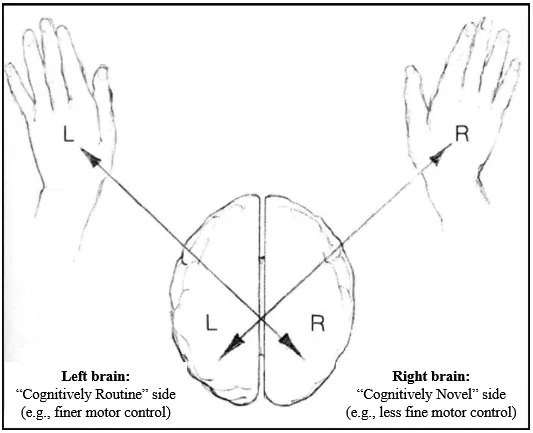


### handedness test
Handedness was assessed using the 11-item Edinburgh Handedness questionnaire [1]. An adapted 8-item version of the questionnaire was used for subjects 5- to 10-years old where the child pretended to perform activities that required using one-hand (e.g. using a hammer, using scissors). For subjects ages 11+, a combined Edinburgh handedness score (hcp_handedness_score data element) is also provided for harmonization with HCP-Young Adult and =sum(writing, throwing, scissors, toothbrush, knife_no_fork, spoon, broom, match, box, foot), where values for elements are coded left=10, strongly prefer left (spl), usually left=-5, no preference =0, strongly prefer right (spr), usually right=5, and right=10. Missing elements are assigned the median of subject's other summands. For subjects 5- to 10-years old, a combined score of the 8-item version (hand_score data element) is provided and =sum (writing, hammer, throwing, toothbrush, hand5, spoon, scissors, hand_15_drink) where values for elements are coded left=0 and right=1. Missing elements are assigned the median of subject's other summands. Item-level responses and scores for this questionnaire can be found in the NDA data structure edinburgh_hand01. score conversion is performed according to [2]

### References:

[1] Oldfield RC. The assessment and analysis of handedness: the Edinburgh inventory. Neuropsychologia. 1971 Mar 1;9(1):97-113.**

[2] Ruck L, Schoenemann PT. Handedness measures for the Human Connectome Project: Implications for data analysis. Laterality. 2021 Sep 3;26(5):584-606.

In [30]:
# Task 1: read the handedness csv data file
# Hint: use pd.read_csv(path/to/data/file) function to read csv
# file name: 'edinburgh_hand01.txt'

### START CODE HERE ### (≈ 1 line of code)

# handedness = pd.read_csv(os.path.join(behavioral_data_path_raw,'file_name.txt'),sep=None,engine='python')

### END CODE HERE ###

# Solution:
handedness = pd.read_csv(os.path.join(behavioral_data_path_raw,'edinburgh_hand01.txt'),sep=None,engine='python')

In [31]:
# Sample data viewing
# Task 2: read the handedness csv data file
# Hint: use table_name.head(number of row tow view) to view 10 rows of the read file

### START CODE HERE ### (≈ 1 line of code)

# handedness.

### END CODE HERE ###

# Solution:
handedness.head()

,collection_id,edinburgh_hand01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,writing,throwing,scissors,toothbrush,knife_no_fork,spoon,broom,match,box,foot,eye,sex,hcp_handedness_score,collection_title
0,collection_id,edinburgh_hand01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Hand subject uses to do named action,Which foot do you prefer to kick with,Which eye do you use when using only one,Sex of the subject,HCP handedness score,collection_title
1,2847,54541,37672,NDAR_INVZJ085JGV,HCA7799311,07/01/2017,739,right,right,right,np,right,spr,right,right,spr,spr,np,F,75,HCP-A Mapping the Human Connectome During Typi...
2,2847,54542,37672,NDAR_INVGX201VG2,HCA6559487,07/01/2017,696,right,right,right,right,right,right,right,right,right,right,left,F,100,HCP-A Mapping the Human Connectome During Typi...
3,2847,54543,37672,NDAR_INVTP444NT2,HCA8749907,07/01/2017,760,right,right,right,right,right,right,np,right,np,right,spr,F,80,HCP-A Mapping the Human Connectome During Typi...
4,2847,54544,37672,NDAR_INVPR447KDA,HCA6640672,07/01/2017,585,right,right,right,right,right,right,right,right,np,right,np,M,90,HCP-A Mapping the Human Connectome During Typi...


In [32]:
# Task 3: print the statistical propoerties of the read file
# Hint: use table_name.describe() to view the statistical properties of the read file

### START CODE HERE ### (≈ 1 line of code)

# handedness.

### END CODE HERE ###

# Solution:
handedness.describe()

,collection_id,edinburgh_hand01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,writing,throwing,scissors,toothbrush,knife_no_fork,spoon,broom,match,box,foot,eye,sex,hcp_handedness_score,collection_title
count,726,726,726,726,726,726,726,726,726,726,726,726,726,726,725,726,725,726,726,726,726
unique,2,726,2,726,726,12,428,5,6,6,6,6,6,6,6,6,6,6,3,40,2
top,2847,edinburgh_hand01_id,37672,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,01/01/2018,1200,right,right,right,right,right,right,right,right,right,right,right,F,100,HCP-A Mapping the Human Connectome During Typi...
freq,725,1,725,1,1,110,13,623,552,580,523,538,515,370,564,381,447,249,406,190,725


In [33]:
# Task4: subject id column name handling
# Hint: use the function table_name.rename to rename the subject ID columns
# {"src_subject_id":"subject"}

### START CODE HERE ### (≈ 1 line of code)

# handedness.rename(columns= {'old_name': 'new_name'} ,inplace=True)

### END CODE HERE ###

# Solution
handedness.rename(columns={"src_subject_id":"subject"},inplace=True)

# save the dataset to disk
handedness.to_csv(os.path.join(behavioral_data_path_interm,'handedness.csv'), index=False)

In [34]:
# Task4: data labeling
# Hint: if the handedness scora > 0 (R) else (L), delete the original handeness score

# scores conversion into lables 


### START CODE HERE ### (≈ 1 line of code)

# handedness['class'] = handedness['hcp_handedness_score'].apply(lambda x: define your function here)


### END CODE HERE ###

# Solution:
handedness = handedness.iloc[1:,:]
handedness['hcp_handedness_score'] = handedness['hcp_handedness_score'].astype(int)
handedness['class'] = handedness['hcp_handedness_score'].apply(lambda x: 'R' if int(x) > 0 else 'L')

In [35]:
# Task5: subject id column name handling
# Hint: use the function table_name.rename to rename the subject ID columns
# {"src_subject_id":"subject"}

### START CODE HERE ### (≈ 1 line of code)

# handedness.rename(columns= {'old_name': 'new_name'} ,inplace=True)

### END CODE HERE ###

# Solution
# cognitive_status.rename(columns={"src_subject_id":"subject"},inplace=True)

# save the dataset to disk
handedness.to_csv(os.path.join(behavioral_data_path_interm,'handedness.csv'), index=False)

In [36]:
# Task6: Link the structural data with handedness lablels and save them as combined dataset in csv format
# Hint: select the the subject and label columns from cognitive_data and merge them with the structural data 
# using pd.merg() function
# Column names: ['subject','class']
# File name: 'structural_handedness.csv'

### START CODE HERE ### (≈ 3 line of code)

# handedness_label = handedness[['add', 'column', 'names', 'here']]
# structural_handedness = pd.merge(structural_data_table, handedness_data_lables)
# structural_handedness.to_csv(os.path.join(preprocessed_data_path,'file_name.csv'),index=False)

### END CODE HERE ###

# Solution:
handedness_label = handedness[['subject','class']]
structural_handedness = pd.merge(structural_data,handedness_label)
structural_handedness.to_csv(os.path.join(preprocessed_data_path,'structural_handedness.csv'),index=False)

## Personality data (Self exercsie: unsolved)

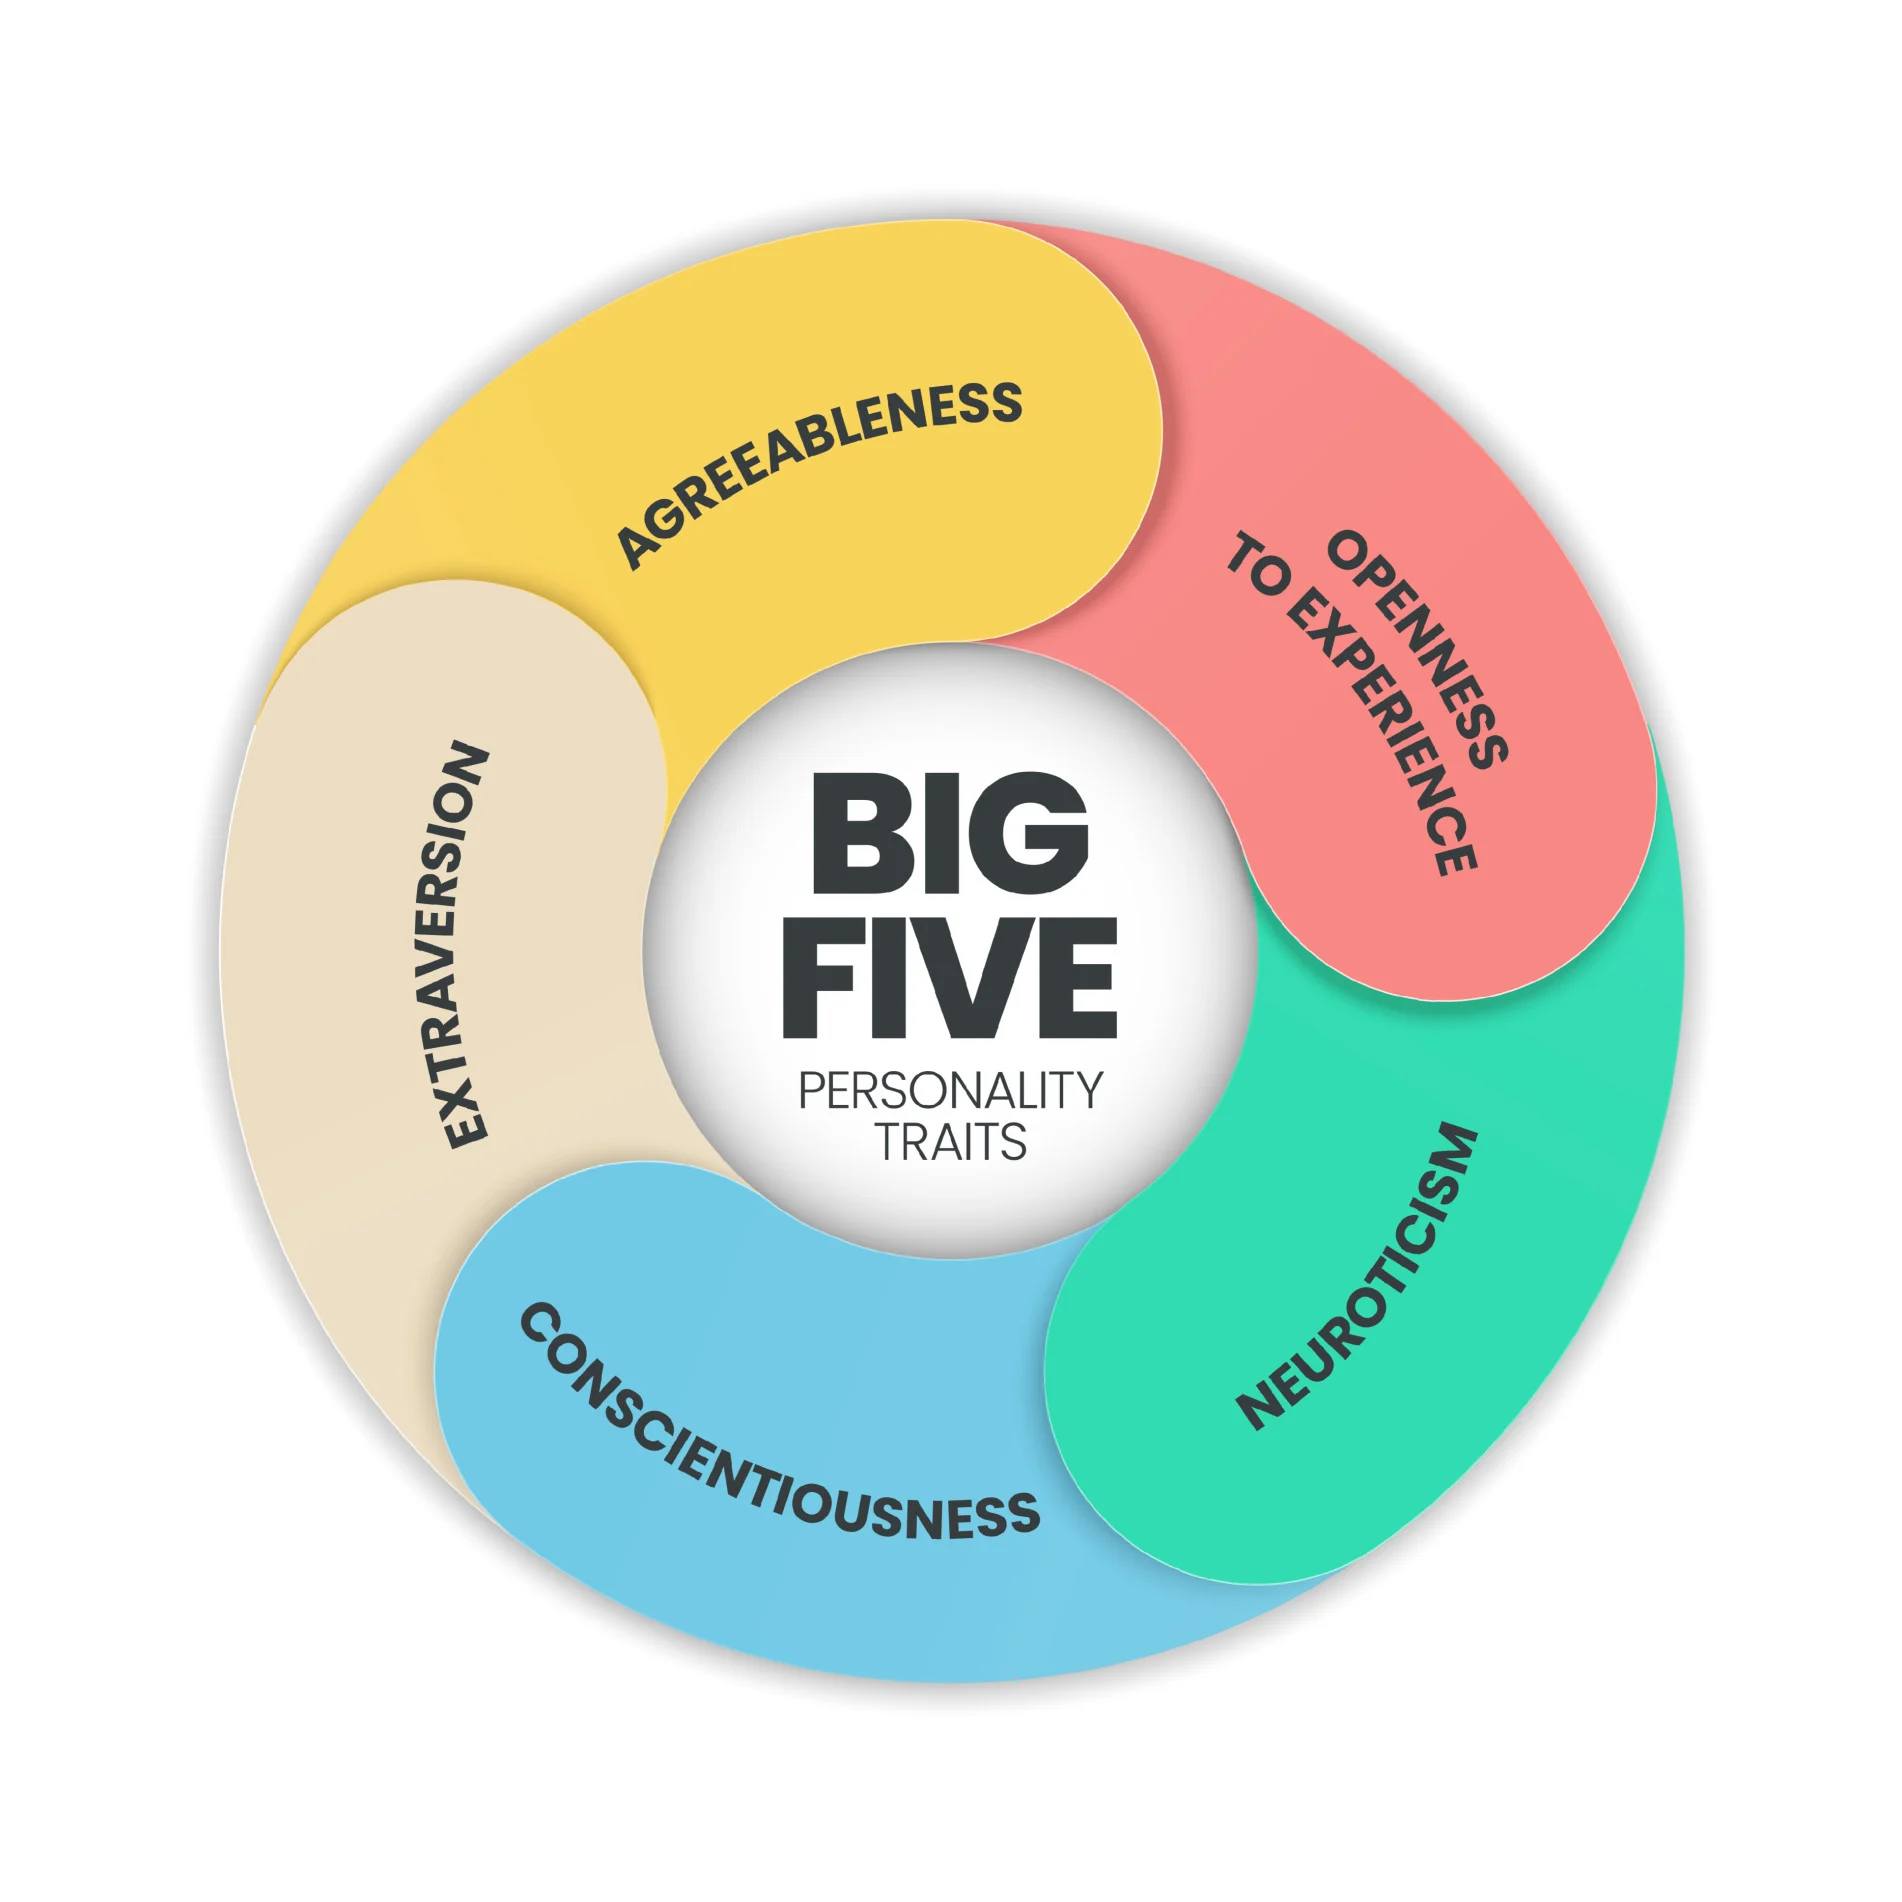

### Description: 
The HCP uses the 60-question version of this questionnaire. It is a quick, reliable, and accurate measure of the 5 broad traits of personality: neuroticism, extraversion, openness, agreeableness, conscientiousness. These 5 broad traits have been generally accepted as describing the personality (Goldberg, 1993; McCrae & Costa, 2004; Costa & McCrae, 2012). NEO was obtained as a self-report from Development participants ages 16+ and all Aging participants ages 36+. This report was administered to participants via an iPad survey from the [REDCap](https://projectredcap.org/about/) platform. Responses to questions from this instrument can be found in the NDA data structure nffi01 [1-3].

For more information about each trait and the scoring system, please refer to [4]

### Reference

[1] Goldberg LR. The structure of phenotypic personality traits. American psychologist. 1993 Jan;48(1):26.

[2] McCrae RR, Costa Jr PT. A contemplated revision of the NEO Five-Factor Inventory. Personality and individual differences. 2004 Feb 1;36(3):587-96.

[3] Costa Jr PT, McCrae RR. The five‐factor model, five‐factor theory, and interpersonal psychology. Handbook of interpersonal psychology: Theory, research, assessment, and therapeutic interventions. 2010 Nov 22:91-104.

[4] Personality and Well-being Results. WarWick university. Available from: https://warwick.ac.uk/services/dc/phdlife/wellbeing/potentialadvantage/personality_and_wellbeing_results/


In [37]:
# Task 1: read the personality csv file
# Hint: use pd.read_csv(path/to/data/file) function to read csv
# File name: 'nffi01.txt'

### START CODE HERE ### (≈ 1 line of code)

personality = pd.read_csv(os.path.join(behavioral_data_path_raw,'nffi01.txt'),sep=None,engine='python')

### END CODE HERE ###

In [38]:
# Task 2: print sample of the read file
# Hint: use table_name.head(number of row tow view) to view 10 rows of the read file

### START CODE HERE ### (≈ 1 line of code)

personality.head()

### END CODE HERE ###

,collection_id,nffi01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,nffi_1,nffi_2,nffi_3,nffi_4,nffi_5,nffi_6,nffi_7,nffi_8,nffi_9,nffi_10,nffi_11,nffi_12,nffi_13,nffi_14,nffi_15,nffi_16,nffi_17,nffi_18,nffi_19,nffi_20,nffi_21,nffi_22,nffi_23,nffi_24,nffi_25,nffi_26,nffi_27,nffi_28,nffi_29,nffi_30,nffi_31,nffi_32,nffi_33,nffi_34,nffi_35,nffi_36,nffi_37,nffi_38,nffi_39,nffi_40,nffi_41,nffi_42,nffi_43,nffi_44,nffi_45,nffi_46,nffi_47,nffi_48,nffi_49,nffi_50,nffi_51,nffi_52,nffi_53,nffi_54,nffi_55,nffi_56,nffi_57,nffi_58,nffi_59,nffi_60,neo2_score_ag,neo2_score_co,neo2_score_ex,neo2_score_ne,neo2_score_op,collection_title
0,collection_id,nffi01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of the subject,I am not a worrier.,I like to have a lot of people around me.,I don't like to waste my time daydreaming.,I try to be courteous to everyone I meet.,I keep my belongings clean and neat.,I often feel inferior to others.,I laugh easily.,"OnceI find the right way to do something, I st...",I often getInto arguments with my family and c...,I'm pretty good about pacing myself so as to g...,"When I'm under a great deal of stress, sometim...","I don't consider myself especially ""light-hear...",I amIntrigued by the patternsI findIn art and ...,Some people thinkI'm selfish and egotistical.,I am not a very methodical person.,I rarely feel lonely or blue.,I really enjoy talking to people.,I believe letting students hear controversial ...,I would rather cooperate with others than comp...,I try to perform all the tasks assigned to me ...,I often feel tense and jittery.,I like to be where the action is.,Poetry has little or no effect on me.,I tend to be cynical and skeptical of others' ...,I have a clear set of goals and work toward th...,Sometimes I feel completely worthless.,I usually prefer to do things alone.,I often try new and foreign foods.,I believe that most people will take advantage...,I waste a lot of time before settling down to ...,I rarely feel fearful or anxious.,I often feel asIfI'm bursting with energy.,I seldom notice the moods or feelings that dif...,Most people I know like me.,I work hard to accomplish my goals.,I often get angry at the way people treat me.,"I am a cheerful, high-spirited person.",I believe we should look to our religious auth...,Some people think of me as cold and calculating.,"When I make a commitment,I can always be count...","Too often when things go wrong,I get discourag...",I am not a cheerful optimist.,Sometimes whenI am reading poetry or looking a...,I'm hard-headed and tough-mindedIn my attitudes.,SometimesI'm not as dependable or reliable asI...,I am seldom sad or depressed.,My lifeIs fast-paced.,I have little interest in speculating on the n...,I generally try to be thoughtful and considerate.,I am a productive person who always gets the j...,I often feel helpless and want someone else to...,I am a very active person.,I have a lot of intellectual curiosity.,"If I don't like people, I let them know it.",I never seem to be able to get organized.,At timesI have been so ashamedI just want to h...,I would rather go my own way than be a leader ...,I often enjoy playing with theories or abstrac...,"If necessary, I am willing to manipulate peopl...",I strive for excellence in everything I do.,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openess,collection_title
1,2847,13055,37672,NDAR_INVAB396JHL,HCA8040759,04/01/2018,624,F,2,2,4,5,4,2,4,4,2,4,2,2,4,2,4,4,4,2,4,4,2,4,2,3,4,1,2,5,2,2,3,4,2,4,4,2,4,4,1,2,3,1,4,4,2,3,3,2,5,4,2,4,4,2,3,2,2,2,2,4,36,31,34,16,29,HCP-A Mapping the Human Connectome During Typi...
2,2847,13056,37672,NDAR_INVGE417NH0,HCA9753094,04/01/2018,656,F,3,4,3,4,4,2,3,4,2,4,2,2,3,3,2,4,4,1,4,4,2,3,2,2,4,2,3,4,2,1,3,2,2,4,5,2,4,3,2,4,1,1,4,1,1,1,4,1,4,4,1,4,4,3,2,1,1,4,1,4,36,39,33,14,33,HCP-A

In [23]:
# Task 3: print the statistical propoerties of the read file
# Hint: use table_name.describe() to view the statistical properties of the read file

### START CODE HERE ### (≈ 1 line of code)

personality.personality.describe()

### END CODE HERE ###

In [40]:
# Task4: data labeling
# Hint: use the defined classes dictionary to convert moca personality traits scores into distinct classes using find_label() 
# function and then delete the original traits columns

# scores conversion into lables 
classes = {'severe':list(range(10)),
           'low':list(range(10,25)),
           'moderate':list(range(24,36)),
           'high':list(range(36,51))
          }
classes
print(classes)

### START CODE HERE ### (≈ 7 line of code)

personality = personality.iloc[1:,:]
personality.iloc[:,-6:-1] = personality.iloc[:,-6:-1].astype(int)
personality['class_ag'] = personality['neo2_score_ag'].apply(lambda x: find_label(classes,x))
personality['class_co'] = personality['neo2_score_co'].apply(lambda x: find_label(classes,x))
personality['class_ex'] = personality['neo2_score_ex'].apply(lambda x: find_label(classes,x))
personality['class_ne'] = personality['neo2_score_ne'].apply(lambda x: find_label(classes,x))
personality['class_op'] = personality['neo2_score_op'].apply(lambda x: find_label(classes,x))

### END CODE HERE ###


{'severe': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'low': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'moderate': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'high': [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [41]:
# Task5: subject id column name handling
# Hint: use the function table_name.rename to rename the subject ID columns
# {"src_subject_id":"subject"}

### START CODE HERE ### (≈ 1 line of code)

personality.rename(columns={"src_subject_id":"subject"},inplace=True)

### END CODE HERE ###

# save the dataset to disk
personality.to_csv(os.path.join(behavioral_data_path_interm,'personality.csv'), index=False)

In [42]:
# Task6: Link the structural data with personality lablels and link save them as combined dataset in csv format
# Hint: select the the subject and label columns from personality and merge them with the structural data 
# using pd.merg() function
# Column names: ['subject','class_ag','class_co','class_ex','class_ne','class_op']
# File name: 'structural_personality.csv'

### START CODE HERE ### (≈ 3 line of code)

personality_labels = personality[['subject','class_ag','class_co','class_ex','class_ne','class_op']]
structural_personality = pd.merge(structural_data,personality_labels)
structural_personality.to_csv(os.path.join(preprocessed_data_path,'structural_personality.csv'),index=False)

### END CODE HERE ###